# Superdense coding


Alice sends two bits to Bob

## Naive Approach

In [2]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
backend = Aer.get_backend('aer_simulator')

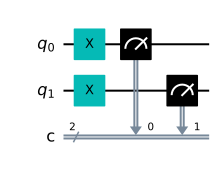

In [3]:
qc_alice = QuantumCircuit(2, 2)

message = '11'
if message[-1] == '1':
    qc_alice.x(0)
if message[-2] == '1':
    qc_alice.x(1)

qc_bob = QuantumCircuit(2, 2)
qc_bob.measure([0,1], [0, 1])


qc = qc_alice.compose(qc_bob)

qc.draw('mpl')

In [4]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'11': 1024}

## With entanglement (no improvement)

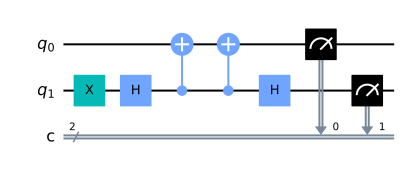

In [5]:
message = '10'
qc_alice = QuantumCircuit(2,2)

if message[-1] == '1':
    qc_alice.x(0)
if message[-2] == '1':
    qc_alice.x(1)
    
qc_alice.h(1)
qc_alice.cx(1,0)

qc_bob = QuantumCircuit(2,2)
qc_bob.cx(1,0)
qc_bob.h(1)

qc_bob.measure([0,1],[0,1])


qc_alice.compose(qc_bob).draw('mpl')

In [6]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'10': 1024}

## Using Entanglement

In [7]:
message = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if message[-2] == '1':
    qc_alice.z(1)
if message[-1] == '1':
    qc_alice.x(1)

qc_bob = QuantumCircuit(2,2)
qc_bob.cx(1,0)
qc_bob.h(1)

qc_bob.measure([0,1], [0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

# qc_alice.draw('mpl')
# Statevector(qc_alice).draw('latex')

{'00': 1024}

## Using Third Party

In [103]:
qc_alice = QuantumCircuit(2,2)

# Done by third party
qc_alice.h(1)
qc_alice.cx(1,0)

# Alice only needs a single bit
qc_alice.x(1)
# qc_alice.z(0)

# Bob decodes two bits
qc_bob = QuantumCircuit(2,2)
qc_bob.cx(1,0)
qc_bob.h(1)

qc_bob.measure([0,1],[0,1])

qc = qc_alice.compose(qc_bob)


Statevector(qc_alice).draw('latex')
# qc.draw('mpl')
# backend.run(qc).result().get_counts()

<IPython.core.display.Latex object>